<a href="https://colab.research.google.com/github/drcrajc/nanoelectronics/blob/main/exp_mosfet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

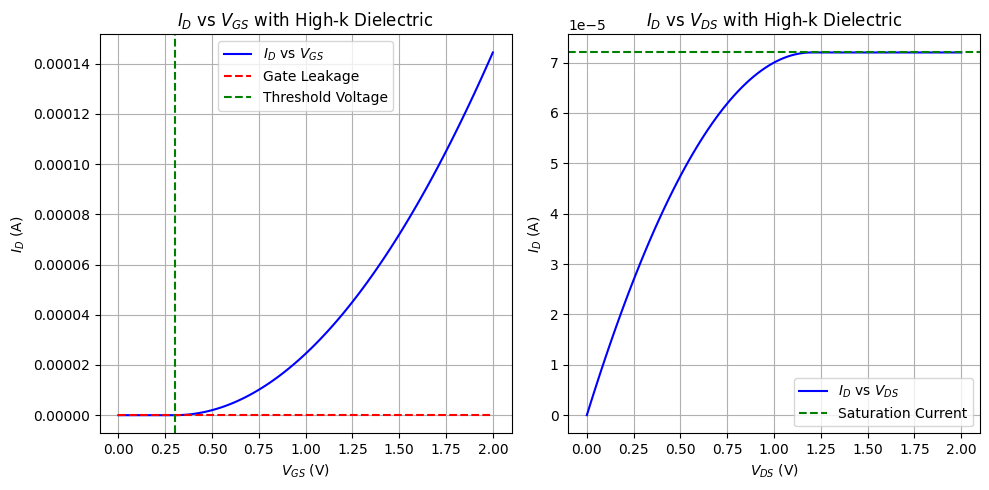

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# MOSFET Parameters (Assumed)
mu_n = 500e-4  # Electron mobility (m^2/Vs)
Cox = 2e-3  # Oxide capacitance per unit area (F/m^2) - high-k material increases this value
W = 1e-6  # Channel width (m)
L = 1e-6  # Channel length (m)
Vth = 0.3  # Threshold voltage (V)
Vgs = np.linspace(0, 2, 100)  # Gate-to-source voltage (V)
Vds = np.linspace(0, 2, 100)  # Drain-to-source voltage (V)

# Define the gate leakage characteristics (assumed linear with Vgs)
gate_leakage_factor = 1e-9  # Gate leakage coefficient
gate_leakage_current = gate_leakage_factor * Vgs

# Define the drain current for different Vgs and Vds
def Id_vs_Vgs(Vgs, Vds, Vth, mu_n, Cox, W, L):
    Id = np.zeros_like(Vgs)
    for i, Vg in enumerate(Vgs):
        if Vg > Vth:
            Id[i] = 0.5 * mu_n * Cox * (W/L) * (Vg - Vth)**2  # Saturation region
        else:
            Id[i] = 0  # Below threshold, current is negligible
    return Id

def Id_vs_Vds(Vgs, Vds, Vth, mu_n, Cox, W, L):
    Id = np.zeros_like(Vds)
    for i, Vd in enumerate(Vds):
        if Vgs > Vth:
            if Vd < (Vgs - Vth):  # Triode region
                Id[i] = mu_n * Cox * (W/L) * ((Vgs - Vth) * Vd - 0.5 * Vd**2)
            else:  # Saturation region
                Id[i] = 0.5 * mu_n * Cox * (W/L) * (Vgs - Vth)**2
        else:
            Id[i] = 0  # Below threshold
    return Id

# Calculate Id for Vgs and Vds
Id_vgs = Id_vs_Vgs(Vgs, 2, Vth, mu_n, Cox, W, L)  # For Vds = 2V
Id_vds = Id_vs_Vds(1.5, Vds, Vth, mu_n, Cox, W, L)  # For Vgs = 1.5V

# Plot Id vs Vgs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(Vgs, Id_vgs, label='$I_D$ vs $V_{GS}$', color='b')
plt.plot(Vgs, gate_leakage_current, label='Gate Leakage', linestyle='--', color='r')
plt.axvline(x=Vth, color='g', linestyle='--', label='Threshold Voltage')
plt.title('$I_D$ vs $V_{GS}$ with High-k Dielectric')
plt.xlabel('$V_{GS}$ (V)')
plt.ylabel('$I_D$ (A)')
plt.legend()
plt.grid(True)

# Plot Id vs Vds
plt.subplot(1, 2, 2)
plt.plot(Vds, Id_vds, label='$I_D$ vs $V_{DS}$', color='b')
plt.axhline(y=max(Id_vds), color='g', linestyle='--', label='Saturation Current')
plt.title('$I_D$ vs $V_{DS}$ with High-k Dielectric')
plt.xlabel('$V_{DS}$ (V)')
plt.ylabel('$I_D$ (A)')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
